In [1]:
import enzope as ezp
from enzope.graphs.graph_class import GTG

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import os
from tqdm import tqdm
from scipy import stats

In [2]:
figpath = os.path.join(os.getcwd(), 'figs')
datapath = os.path.join(os.getcwd(), 'data')

# Parametros de distribucion de Pareto
# f(w) = (a/m) * (w/m)^-(a+1)
a, m = 1.5, 1  # shape and mode

In [3]:
def custom_distance(u_pos, v_pos):
    # Calculate distance using custom formula for torus-like boundary conditions
    boundary_size = 1
    distance = 0
    for i in range(len(u_pos)):
        delta = abs(u_pos[i] - v_pos[i])
        delta = min(delta, boundary_size - delta)  # Consider the shortest wrap-around distance
        distance += delta ** 2
    return math.sqrt(distance)


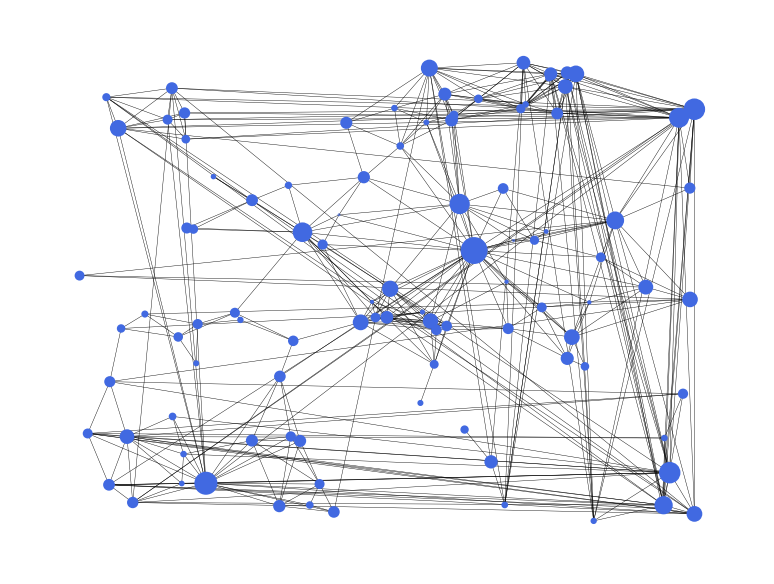

In [4]:
gtg2 = GTG(n_nodes=100, theta=70, plotable=True, seed=10, metric=custom_distance)
gtg2.plot_snapshot()

6.84


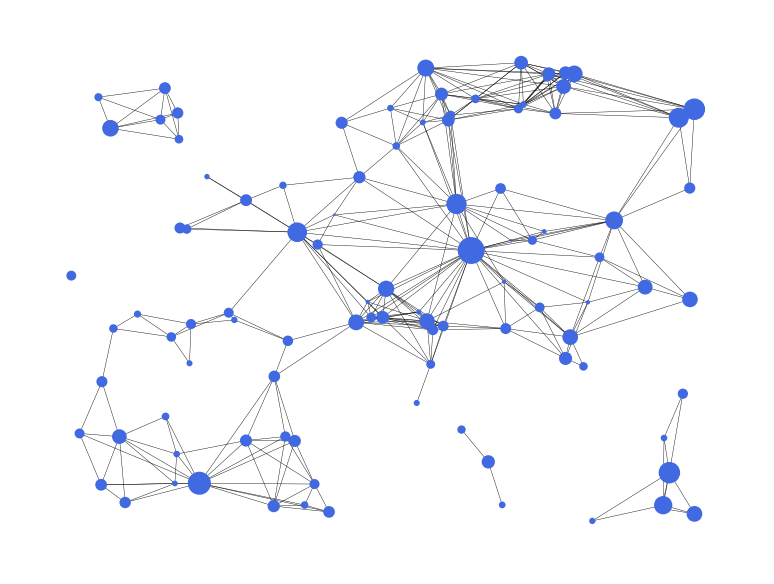

In [51]:
gtg2 = GTG(n_nodes=100, theta=70, plotable=True, seed=10)
print(gtg2.get_mean_connectivity())
gtg2.plot_snapshot()

6.84


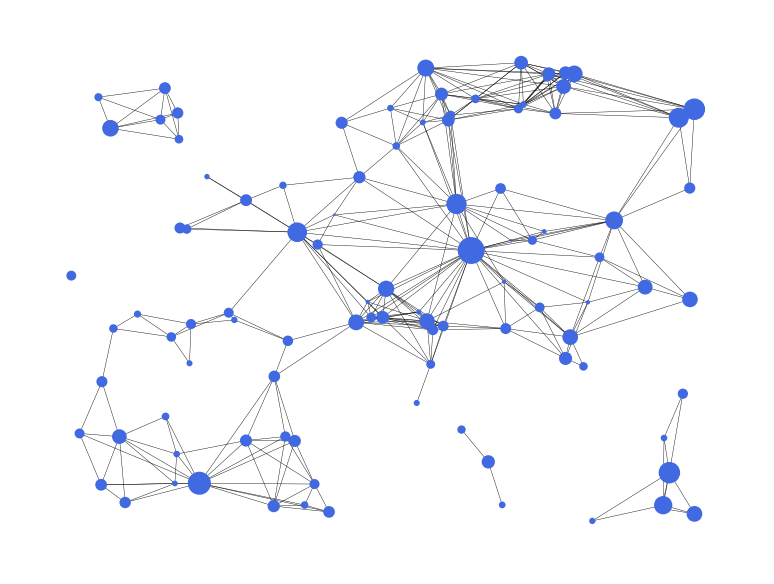

6.26


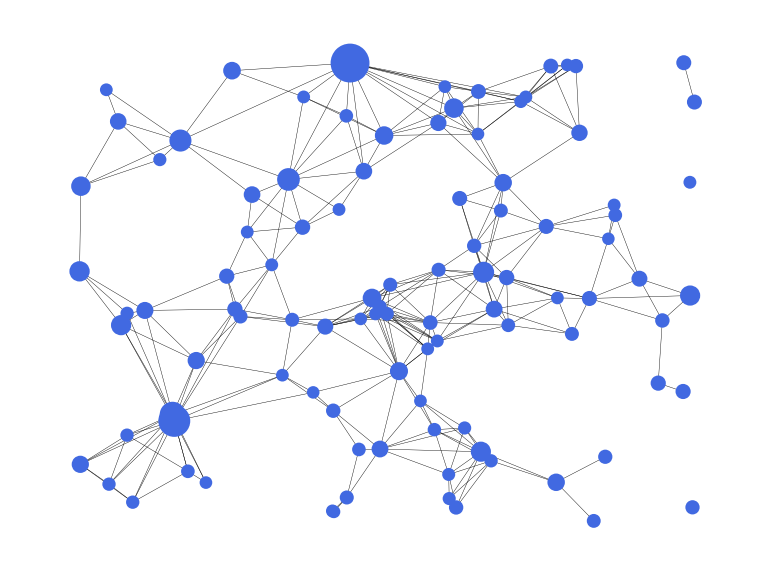

In [59]:
a, m = 1.5, .5
ws = dict(enumerate((np.random.default_rng().pareto(a, 100) + 2) * m))
gtg2 = GTG(n_nodes=100, theta=70, plotable=True, seed=10)
print(gtg2.get_mean_connectivity())
gtg2.plot_snapshot()
grafo = GTG(n_nodes=100, theta=150, w0=ws, plotable=True, seed=10)
print(grafo.get_mean_connectivity())
grafo.plot_snapshot()

In [52]:
n_nodes = 10000
gtg = GTG(n_nodes=n_nodes, theta=5000, plotable=True)
gtg3 = GTG(n_nodes=n_nodes, theta=5000, plotable=True, join='mul')

print(gtg.get_mean_degree(), gtg3.get_mean_degree())

(12.5422, 7.382060631016247) (6.215, 6.792626517040371)


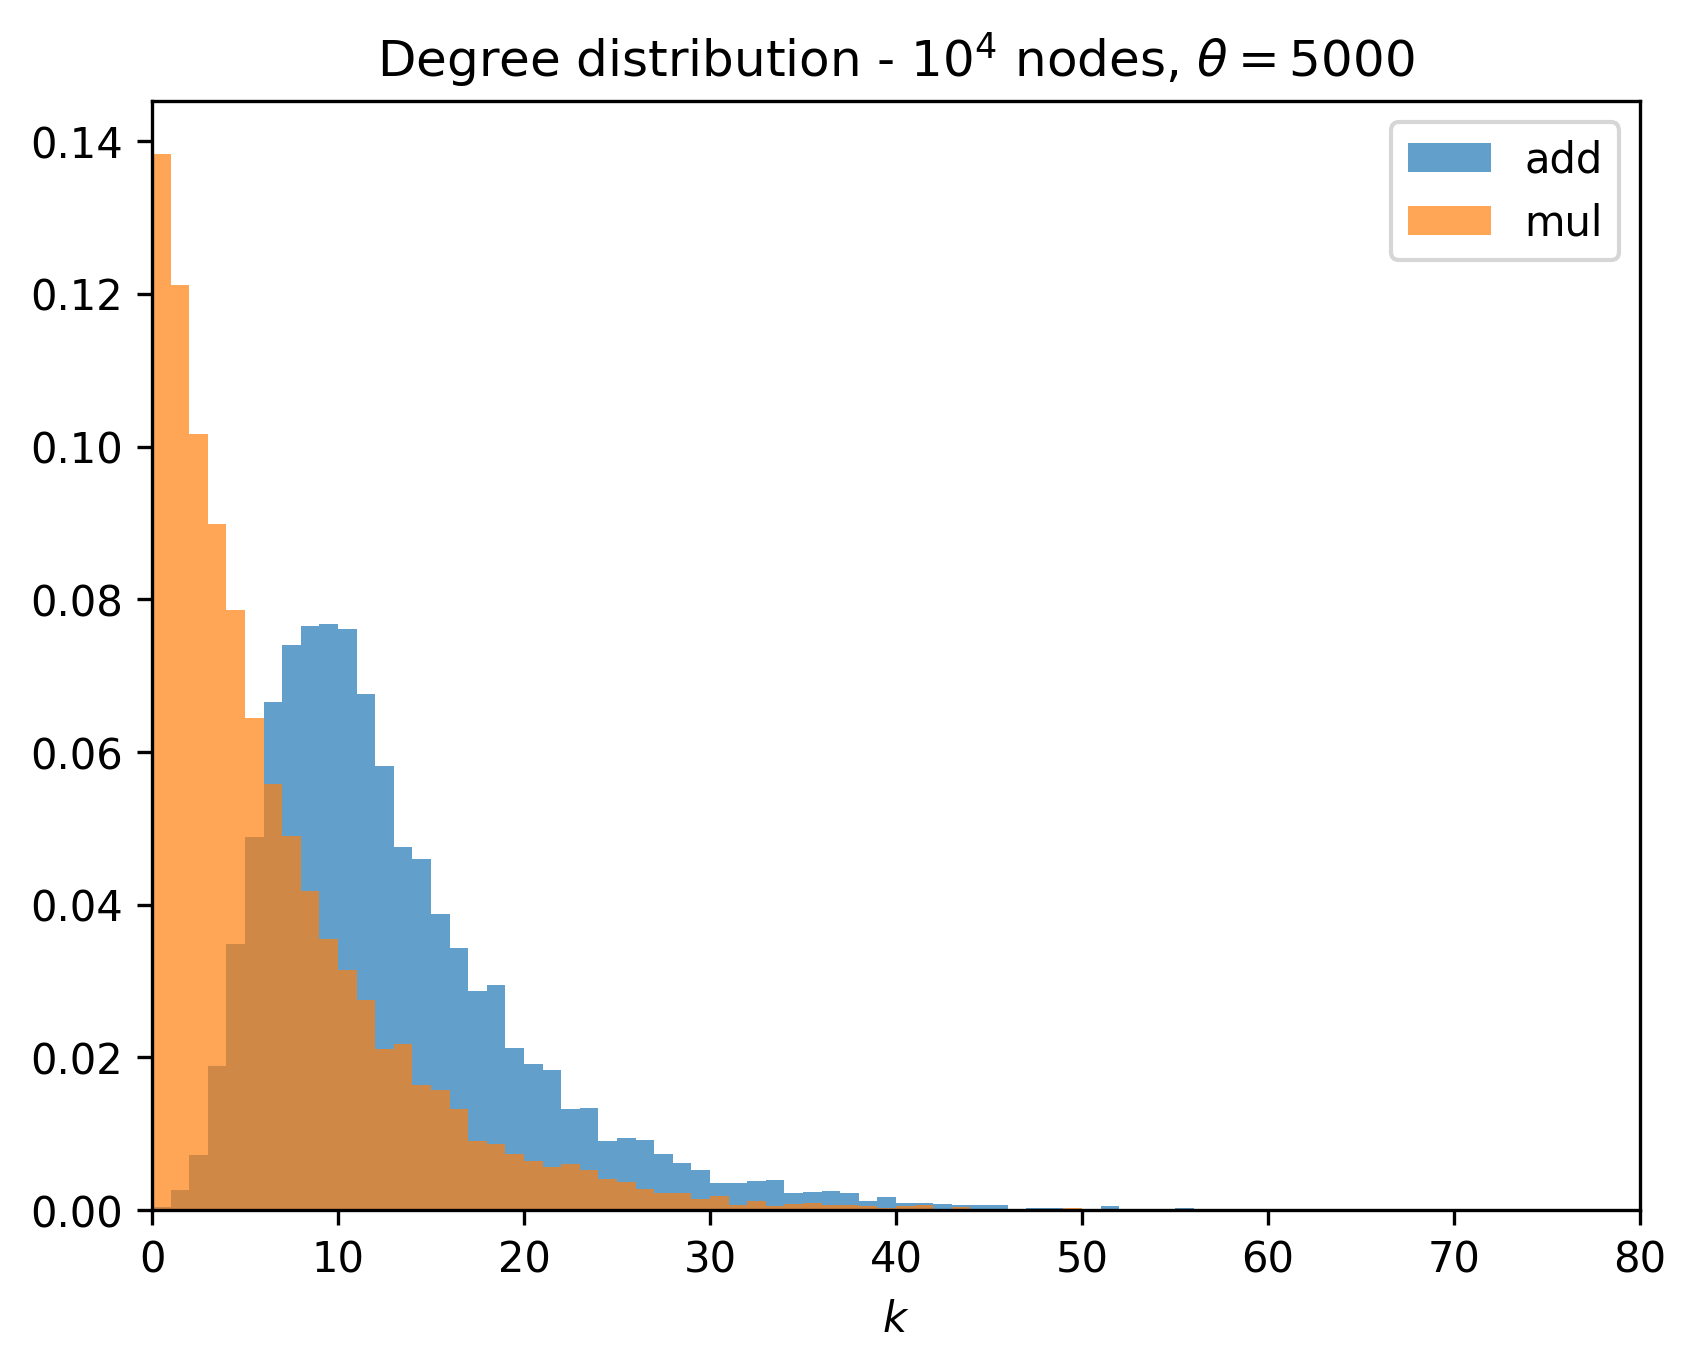

In [67]:
n_neighs = np.array(list(dict(nx.degree(gtg.G)).values()));
n_neighs3 = np.array(list(dict(nx.degree(gtg3.G)).values()));

fig, ax = plt.subplots(dpi=300)
ax.set_xlim(0, 80)
ax.set_xlabel(r'$k$')
ax.set_title(r'Degree distribution - $10^4$ nodes, $\theta=5000$')
ax.hist(n_neighs, bins=range(80), density=True, label='add', alpha=0.7);
ax.hist(n_neighs3, bins=range(80), density=True, label='mul', alpha=0.7);
ax.legend()
fig.savefig(os.path.join(figpath, 'p(k)_muestra.svg'))

In [59]:
a = 1.5
m = 1/3
weights = dict(enumerate((np.random.default_rng().pareto(a, n_nodes) + 2) * m))
gtg2 = GTG(n_nodes=n_nodes, theta=10000, plotable=True, w0=weights)
gtg4 = GTG(n_nodes=n_nodes, theta=10000, plotable=True, w0=weights, join='mul')
print(gtg2.get_mean_degree(), gtg4.get_mean_degree())

(7.8522, 7.723079383251218) (4.9526, 9.96495625881017)


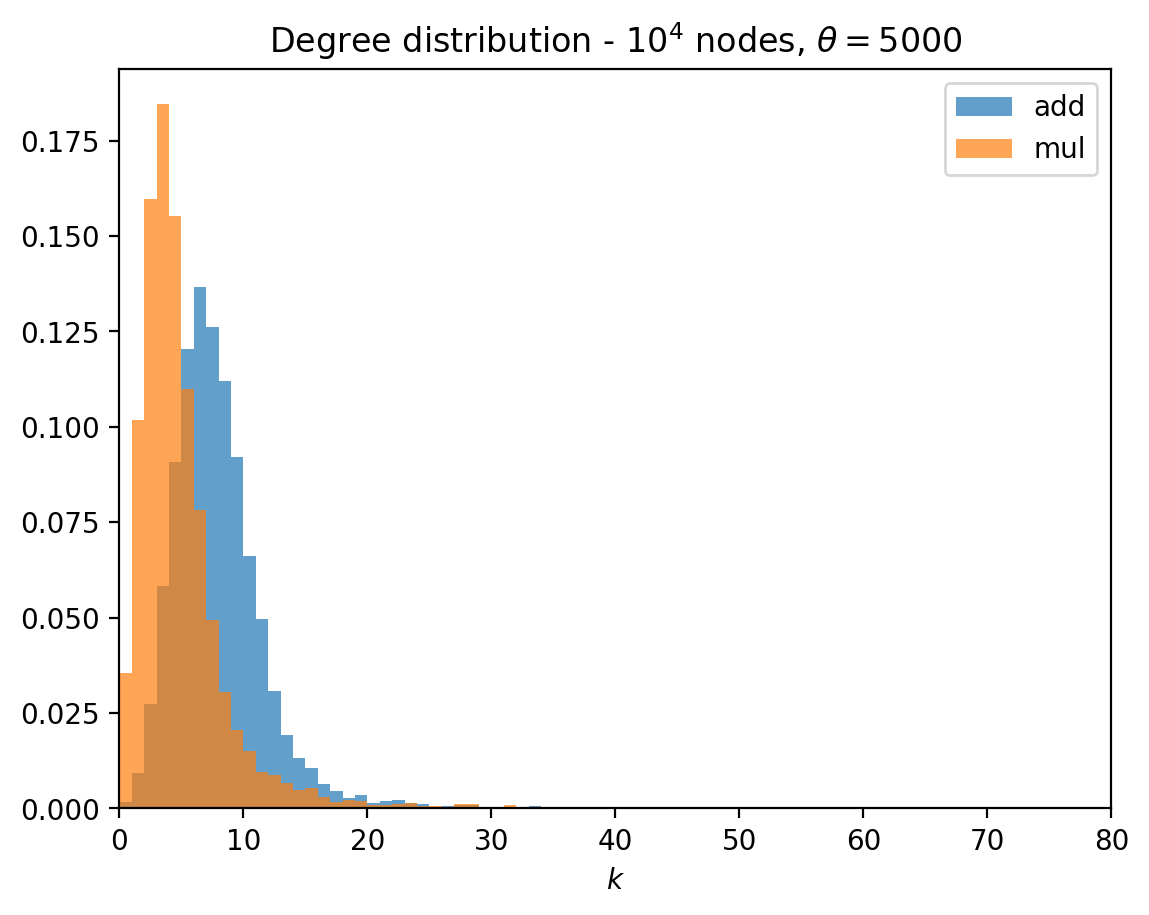

In [62]:
n_neighs2 = np.array(list(dict(nx.degree(gtg2.G)).values()));
n_neighs4 = np.array(list(dict(nx.degree(gtg4.G)).values()));
fig, ax = plt.subplots(dpi=200)
plt.xlim(0, 80)
plt.xlabel(r'$k$')
plt.title(r'Degree distribution - $10^4$ nodes, $\theta=5000$')
plt.hist(n_neighs2, bins=range(80), density=True, label='add', alpha=0.7);
plt.hist(n_neighs4, bins=range(80), density=True, label='mul', alpha=0.7);
plt.legend()
# plt.savefig(os.path.join(figpath, 'p(k)_muestra.svg'))

### p(k) normal vs custom distance

In [28]:
n_nodes = 10000
semilla = np.random.randint(0, 100000)
gtg = GTG(n_nodes=n_nodes, theta=700, plotable=True, seed=semilla)
gtg2 = GTG(n_nodes=n_nodes, theta=700, plotable=True, metric=custom_distance, seed=semilla)


84.3522 89.4414


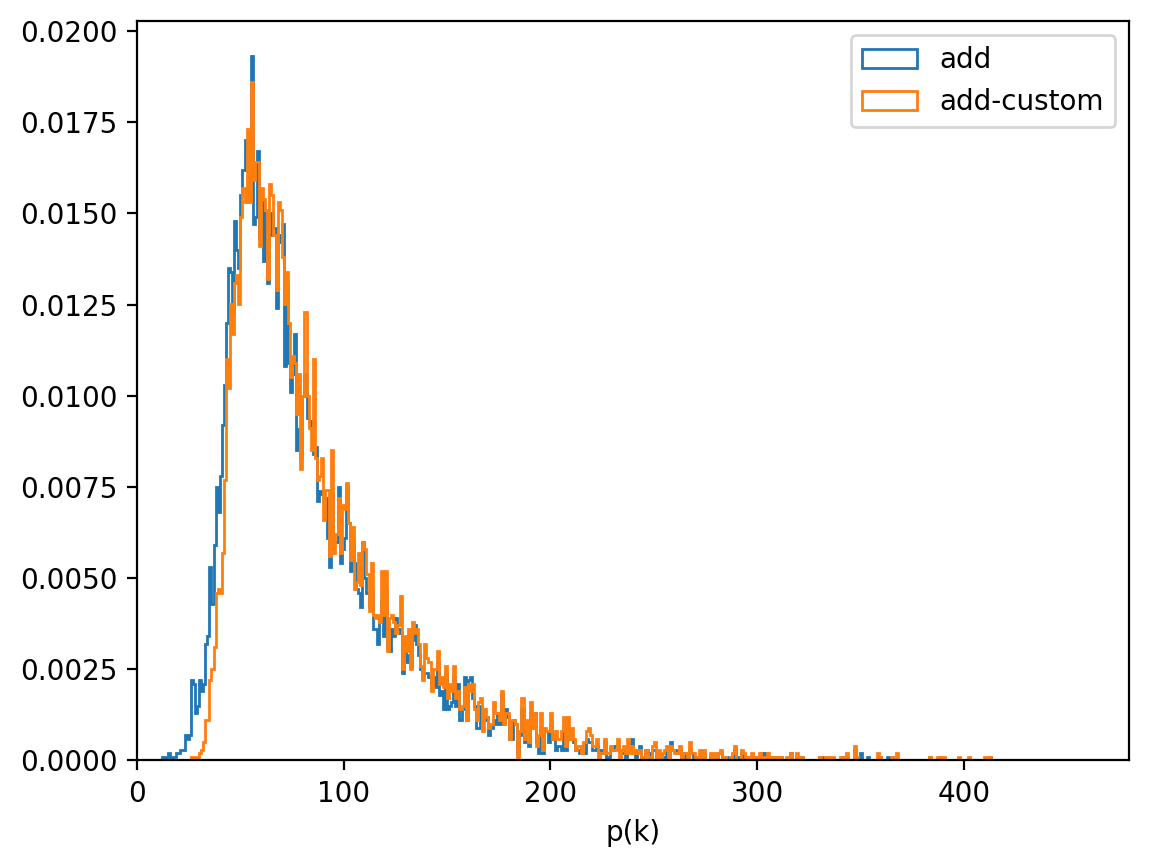

In [29]:
n_neighs = np.array(list(dict(nx.degree(gtg.G)).values()));
n_neighs2 = np.array(list(dict(nx.degree(gtg2.G)).values()));
fig, ax = plt.subplots(dpi=200)
print(np.mean(n_neighs), np.mean(n_neighs2))
plt.xlim(0, max(n_neighs))
plt.xlabel('p(k)')
plt.hist(n_neighs, bins=range(max(n_neighs)), density=True, histtype='step', label='add');
plt.hist(n_neighs2, bins=range(max(n_neighs)), density=True, histtype='step', label='add-custom');
plt.legend()

## 13/11: Analisis de GTGs

### Conectividad en función de tamaño (pesos exponenciales)

In [10]:
sizes = np.arange(100, 4000, 200)

redes_add1 = [GTG(n_nodes=size, theta=500) for size in sizes]
redes_mul1 = [GTG(n_nodes=size, theta=500, join='mul') for size in sizes]
ks_add1 = [redes_add1[i].get_mean_connectivity() for i in range(len(redes_add1))]
ks_mul1 = [redes_mul1[i].get_mean_connectivity() for i in range(len(redes_mul1))]
redes_add2 = [GTG(n_nodes=size, theta=1000) for size in sizes]
redes_mul2 = [GTG(n_nodes=size, theta=1000, join='mul') for size in sizes]
ks_add2 = [redes_add2[i].get_mean_connectivity() for i in range(len(redes_add2))]
ks_mul2 = [redes_mul2[i].get_mean_connectivity() for i in range(len(redes_mul2))]
redes_add3 = [GTG(n_nodes=size, theta=5000) for size in sizes]
redes_mul3 = [GTG(n_nodes=size, theta=5000, join='mul') for size in sizes]
ks_add3 = [redes_add3[i].get_mean_connectivity() for i in range(len(redes_add3))]
ks_mul3 = [redes_mul3[i].get_mean_connectivity() for i in range(len(redes_mul3))]
# Lo mismo para una red con pesos tipo ley de potencias
weights = [dict(enumerate((np.random.default_rng().pareto(a, size) + 1) * m)) for size in sizes]
redes_add_par = [GTG(n_nodes=size, theta=5000, w0=weights[i]) for i, size in enumerate(sizes)]
# Nuevos pesos para la multiplicativa
weights = [dict(enumerate((np.random.default_rng().pareto(a, size) + 1) * m)) for size in sizes]
redes_mul_par = [GTG(n_nodes=size, theta=5000, w0=weights[i], join='mul') for i, size in enumerate(sizes)]
ks_add_par = [redes_add_par[i].get_mean_connectivity() for i in range(len(redes_add_par))]
ks_mul_par = [redes_mul_par[i].get_mean_connectivity() for i in range(len(redes_mul_par))]

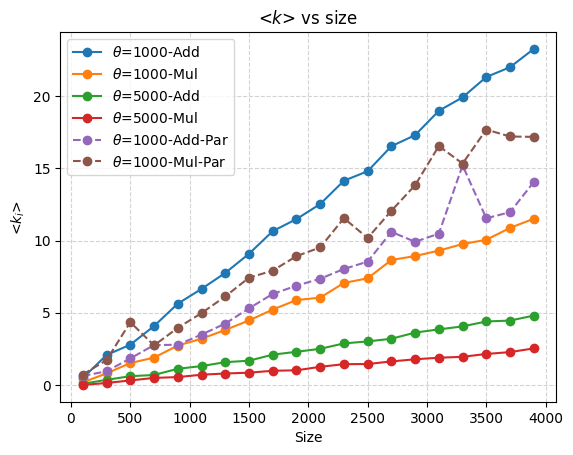

In [11]:
plt.title(r'<$k$> vs size')
# plt.plot(sizes, ks_add1, label='add-500', marker='o')
# plt.plot(sizes, ks_mul1, label='mul-500', marker='o', linestyle='--')
plt.plot(sizes, ks_add2, label=r'${\theta}$=1000-Add', marker='o')
plt.plot(sizes, ks_mul2, label=r'${\theta}$=1000-Mul', marker='o')
plt.plot(sizes, ks_add3, label=r'${\theta}$=5000-Add', marker='o')
plt.plot(sizes, ks_mul3, label=r'${\theta}$=5000-Mul', marker='o')
plt.plot(sizes, ks_add_par, label=r'${\theta}$=1000-Add-Par', marker='o', linestyle='--')
plt.plot(sizes, ks_mul_par, label=r'${\theta}$=1000-Mul-Par', marker='o', linestyle='--')
plt.xlabel('Size')
plt.ylabel('<$k_i$>')
plt.grid(color='lightgray', linestyle='--')
plt.legend();
# plt.savefig(os.path.join(figpath, 'theta(size).svg'))

### $\theta$ fijo, average_mean_distance en función del tamaño (small-worldness)

In [6]:
theta = 1000
new_sizes = []
new_sizes = np.append(np.arange(100, 300, 200), np.arange(300, 800, 50))
new_sizes = np.append(new_sizes, np.arange(1000, 2000, 300))
new_sizes

array([ 100,  300,  350,  400,  450,  500,  550,  600,  650,  700,  750,
       1000, 1300, 1600, 1900])

In [23]:
reps = 10
realizaciones_add = []
realizaciones_mul = []
realizaciones_add_par = []
realizaciones_mul_par = []


for i in range(reps):
    print(f"Realización {str(i+1)} de {reps}")
    redes_add = [GTG(n_nodes=size, theta=theta) for size in new_sizes]
    redes_mul = [GTG(n_nodes=size, theta=theta, join='mul') for size in new_sizes]
    
    weights = [dict(enumerate((np.random.default_rng().pareto(a, size) + 1) * m)) for size in new_sizes]
    redes_add_par = [GTG(n_nodes=size, theta=theta, w0=weights[i]) for i, size in enumerate(new_sizes)]
    redes_mul_par = [GTG(n_nodes=size, theta=theta, w0=weights[i], join='mul') for i, size in enumerate(new_sizes)]

    path_lengths_add = [redes_add[i].get_average_distance() for i in range(len(redes_add))]
    path_length_mul = [redes_mul[i].get_average_distance() for i in range(len(redes_mul))]
    path_lengths_add_par = [redes_add_par[i].get_average_distance() for i in range(len(redes_add_par))]
    path_length_mul_par = [redes_mul_par[i].get_average_distance() for i in range(len(redes_mul_par))]

    realizaciones_add.append(path_lengths_add)
    realizaciones_mul.append(path_length_mul)
    realizaciones_add_par.append(path_lengths_add_par)
    realizaciones_mul_par.append(path_length_mul_par)

Realización 1 de 10
Realización 2 de 10
Realización 3 de 10
Realización 4 de 10
Realización 5 de 10
Realización 6 de 10
Realización 7 de 10
Realización 8 de 10
Realización 9 de 10
Realización 10 de 10


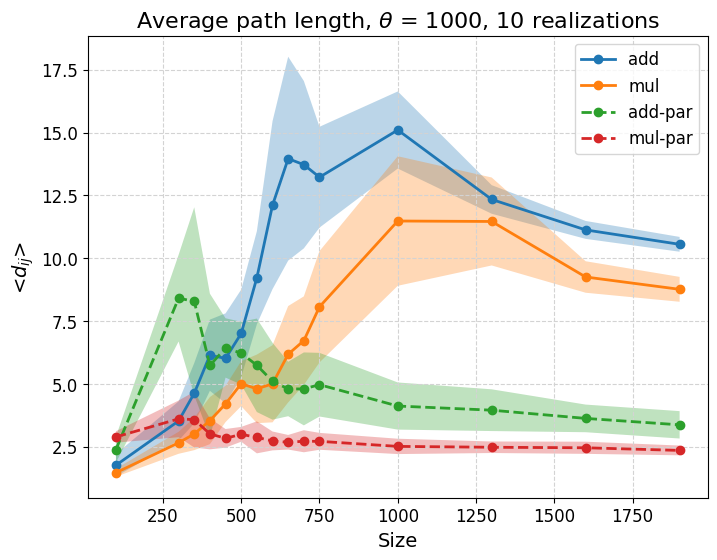

In [31]:
# fix this cell so that it plots Average distance vs Size with the mean of each realization and the std error
path_length_add = np.array(realizaciones_add).mean(axis=0)
path_length_mul = np.array(realizaciones_mul).mean(axis=0)
path_length_add_par = np.array(realizaciones_add_par).mean(axis=0)
path_length_mul_par = np.array(realizaciones_mul_par).mean(axis=0)

std_add = np.array(realizaciones_add).std(axis=0)
std_mul = np.array(realizaciones_mul).std(axis=0)
std_add_par = np.array(realizaciones_add_par).std(axis=0)
std_mul_par = np.array(realizaciones_mul_par).std(axis=0)

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.title(r'Average path length, ${\theta}$ = 1000, 10 realizations', fontsize=16)

# Plot with shaded regions
plt.plot(new_sizes, path_length_add, label='add', marker='o', linestyle='-', linewidth=2)
plt.fill_between(new_sizes, path_length_add - std_add, path_length_add + std_add, alpha=0.3)

plt.plot(new_sizes, path_length_mul, label='mul', marker='o', linestyle='-', linewidth=2)
plt.fill_between(new_sizes, path_length_mul - std_mul, path_length_mul + std_mul, alpha=0.3)

plt.plot(new_sizes, path_length_add_par, label='add-par', marker='o', linestyle='--', linewidth=2)
plt.fill_between(new_sizes, path_length_add_par - std_add_par, path_length_add_par + std_add_par, alpha=0.3)

plt.plot(new_sizes, path_length_mul_par, label='mul-par', marker='o', linestyle='--', linewidth=2)
plt.fill_between(new_sizes, path_length_mul_par - std_mul_par, path_length_mul_par + std_mul_par, alpha=0.3)

# Add legend with a larger font size
plt.legend(fontsize=12)

plt.xlabel('Size', fontsize=14)
plt.ylabel('<$d_{ij}$>', fontsize=14)

# Add grid with a lighter color
plt.grid(color='lightgray', linestyle='--')

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

plt.savefig(os.path.join(figpath, 'avg_path_length(size).svg'))

plt.show()

### Falta: conectividad en funcion de theta, asortatividad, centralidad y clustering

In [9]:
thetas = np.append(np.arange(100, 1000, 100), np.arange(1000, 20000, 400))
thetas_par = np.append(np.arange(200, 1000, 100), np.arange(1000, 20000, 400))

# Average connectivity
conn_add = []
conn_mul = []
conn_add_par = []
conn_mul_par = []

# Average clustering
clust_add = []
clust_mul = []
clust_add_par = []
clust_mul_par = []

# Average centrality
cent_add = []
cent_mul = []
cent_add_par = []
cent_mul_par = []

# Average assortativity
asor_add = []
asor_mul = []
asor_add_par = []
asor_mul_par = []

In [21]:
reps = 300
n_nodes = 1000

for rep in tqdm(range(reps)):
    redes_add_conn = [GTG(n_nodes=n_nodes, theta=theta) for theta in thetas]
    redes_mul_conn = [GTG(n_nodes=n_nodes, theta=theta, join='mul') for theta in thetas]
    
    weights = [dict(enumerate((np.random.default_rng().pareto(a, n_nodes) + 1) * m)) for _ in thetas_par]
    redes_add_conn_par = [GTG(n_nodes=n_nodes, theta=theta, w0=weights[i]) for i, theta in enumerate(thetas_par)]
    # Repito para hacer redes distintas
    weights = [dict(enumerate((np.random.default_rng().pareto(a, n_nodes) + 1) * m)) for _ in thetas_par]
    redes_mul_conn_par = [GTG(n_nodes=n_nodes, theta=theta, w0=weights[i], join='mul') for i, theta in enumerate(thetas_par)]
    
    conn_add.append([redes_add_conn[i].get_mean_connectivity() for i in range(len(redes_add_conn))])
    conn_mul.append([redes_mul_conn[i].get_mean_connectivity() for i in range(len(redes_mul_conn))])
    conn_add_par.append([redes_add_conn_par[i].get_mean_connectivity() for i in range(len(redes_add_conn_par))])
    conn_mul_par.append([redes_mul_conn_par[i].get_mean_connectivity() for i in range(len(redes_mul_conn_par))])

    clust_add.append([nx.average_clustering(redes_add_conn[i].G) for i in range(len(redes_add_conn))])
    clust_mul.append([nx.average_clustering(redes_mul_conn[i].G) for i in range(len(redes_mul_conn))])
    clust_add_par.append([nx.average_clustering(redes_add_conn_par[i].G) for i in range(len(redes_add_conn_par))])
    clust_mul_par.append([nx.average_clustering(redes_mul_conn_par[i].G) for i in range(len(redes_mul_conn_par))])

    cent_add.append([np.mean(list(nx.degree_centrality(redes_add_conn[i].G).values())) for i in range(len(redes_add_conn))])
    cent_mul.append([np.mean(list(nx.degree_centrality(redes_mul_conn[i].G).values())) for i in range(len(redes_mul_conn))])
    cent_add_par.append([np.mean(list(nx.degree_centrality(redes_add_conn_par[i].G).values())) for i in range(len(redes_add_conn_par))])
    cent_mul_par.append([np.mean(list(nx.degree_centrality(redes_mul_conn_par[i].G).values())) for i in range(len(redes_mul_conn_par))])

    asor_add.append([nx.degree_assortativity_coefficient(redes_add_conn[i].G) for i in range(len(redes_add_conn))])
    asor_mul.append([nx.degree_assortativity_coefficient(redes_mul_conn[i].G) for i in range(len(redes_mul_conn))])
    asor_add_par.append([nx.degree_assortativity_coefficient(redes_add_conn_par[i].G) for i in range(len(redes_add_conn_par))])
    asor_mul_par.append([nx.degree_assortativity_coefficient(redes_mul_conn_par[i].G) for i in range(len(redes_mul_conn_par))])


100%|██████████| 300/300 [8:25:01<00:00, 101.00s/it]  


### Voy a dejar corriendo muchas reps y guardar luego los archivos .npy

In [22]:
# Convert previous lists into arrays and save in .npz in the data folder (in the same line of code)
np.save(os.path.join(datapath, 'conn_add.npy'), np.array(conn_add))
np.save(os.path.join(datapath, 'conn_mul.npy'), np.array(conn_mul))
np.save(os.path.join(datapath, 'conn_add_par.npy'), np.array(conn_add_par))
np.save(os.path.join(datapath, 'conn_mul_par.npy'), np.array(conn_mul_par))
np.save(os.path.join(datapath, 'clust_add.npy'), np.array(clust_add))
np.save(os.path.join(datapath, 'clust_mul.npy'), np.array(clust_mul))
np.save(os.path.join(datapath, 'clust_add_par.npy'), np.array(clust_add_par))
np.save(os.path.join(datapath, 'clust_mul_par.npy'), np.array(clust_mul_par))
np.save(os.path.join(datapath, 'cent_add.npy'), np.array(cent_add))
np.save(os.path.join(datapath, 'cent_mul.npy'), np.array(cent_mul))
np.save(os.path.join(datapath, 'cent_add_par.npy'), np.array(cent_add_par))
np.save(os.path.join(datapath, 'cent_mul_par.npy'), np.array(cent_mul_par))
np.save(os.path.join(datapath, 'asor_add.npy'), np.array(asor_add))
np.save(os.path.join(datapath, 'asor_mul.npy'), np.array(asor_mul))
np.save(os.path.join(datapath, 'asor_add_par.npy'), np.array(asor_add_par))
np.save(os.path.join(datapath, 'asor_mul_par.npy'), np.array(asor_mul_par))


In [10]:
# Load all .npy
conn_add = np.load(os.path.join(datapath, 'conn_add.npy'))
conn_mul = np.load(os.path.join(datapath, 'conn_mul.npy'))
conn_add_par = np.load(os.path.join(datapath, 'conn_add_par.npy'))
conn_mul_par = np.load(os.path.join(datapath, 'conn_mul_par.npy'))
clust_add = np.load(os.path.join(datapath, 'clust_add.npy'))
clust_mul = np.load(os.path.join(datapath, 'clust_mul.npy'))
clust_add_par = np.load(os.path.join(datapath, 'clust_add_par.npy'))
clust_mul_par = np.load(os.path.join(datapath, 'clust_mul_par.npy'))
cent_add = np.load(os.path.join(datapath, 'cent_add.npy'))
cent_mul = np.load(os.path.join(datapath, 'cent_mul.npy'))
cent_add_par = np.load(os.path.join(datapath, 'cent_add_par.npy'))
cent_mul_par = np.load(os.path.join(datapath, 'cent_mul_par.npy'))
asor_add = np.load(os.path.join(datapath, 'asor_add.npy'))
asor_mul = np.load(os.path.join(datapath, 'asor_mul.npy'))
asor_add_par = np.load(os.path.join(datapath, 'asor_add_par.npy'))
asor_mul_par = np.load(os.path.join(datapath, 'asor_mul_par.npy'))


### Average connectivity

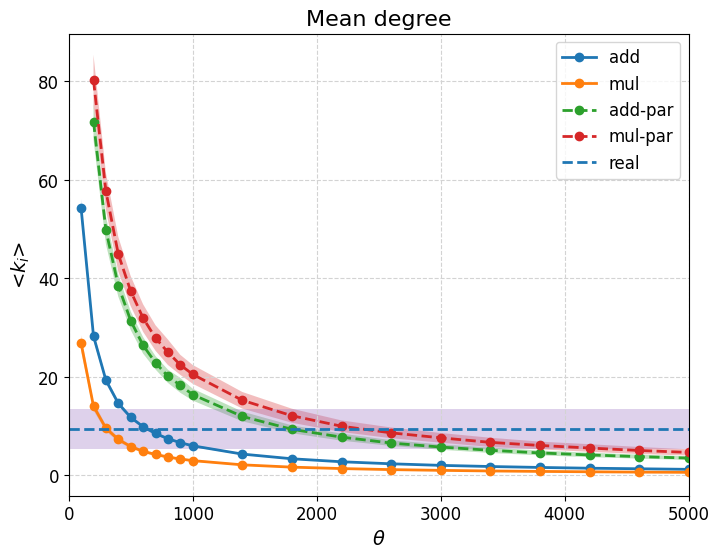

In [15]:
# Plotting connectivity vs theta
# Mean values
conn_add_mean = np.array(conn_add).mean(axis=0)
conn_mul_mean = np.array(conn_mul).mean(axis=0)
conn_add_par_mean = np.array(conn_add_par).mean(axis=0)
conn_mul_par_mean = np.array(conn_mul_par).mean(axis=0)

# Compute stds
conn_add_std = np.array(conn_add).std(axis=0)
conn_mul_std = np.array(conn_mul).std(axis=0)
conn_add_par_std = np.array(conn_add_par).std(axis=0)
conn_mul_par_std = np.array(conn_mul_par).std(axis=0)

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.title(r'Mean degree', fontsize=16)

# Plot with shaded regions
plt.plot(thetas, conn_add_mean, label='add', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, conn_add_mean - conn_add_std, conn_add_mean + conn_add_std, alpha=0.3)

plt.plot(thetas, conn_mul_mean, label='mul', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, conn_mul_mean - conn_mul_std, conn_mul_mean + conn_mul_std, alpha=0.3)

plt.plot(thetas_par, conn_add_par_mean, label='add-par', marker='o', linestyle='--', linewidth=2)
plt.fill_between(thetas_par, conn_add_par_mean - conn_add_par_std, conn_add_par_mean + conn_add_par_std, alpha=0.3)

plt.plot(thetas_par, conn_mul_par_mean, label='mul-par', marker='o', linestyle='--', linewidth=2)
plt.fill_between(thetas_par, conn_mul_par_mean - conn_mul_par_std, conn_mul_par_mean + conn_mul_par_std, alpha=0.3)


avg_neighs_real = 9.42 
neighs_std = 4.12
neighs_soja = 10.74
plt.hlines(avg_neighs_real, 0, 5000, label='real', linestyle='--', linewidth=2)
plt.fill_between([0, 5000], avg_neighs_real - neighs_std, avg_neighs_real + neighs_std, alpha=0.3)
# plt.hlines(neighs_soja, 0, 5000, label='soja', linestyle='--', linewidth=2, colors='green')

# Add legend with a larger font size
plt.legend(fontsize=12)

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'<$k_i$>', fontsize=14)
plt.xlim(0, 5000)
# Add grid with a lighter color
plt.grid(color='lightgray', linestyle='--')

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

# plt.savefig(os.path.join(figpath, 'avg_k(theta)_true.svg'))

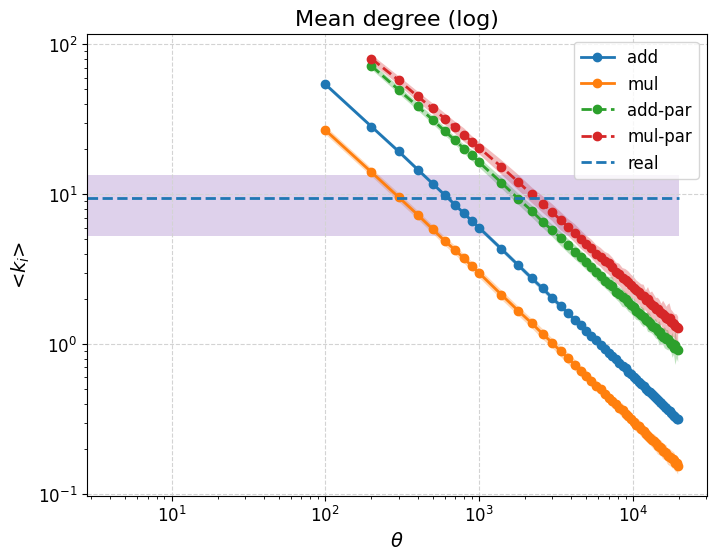

In [18]:
# Misma figura pero en ejes logaritmicos
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.title(r'Mean degree (log)', fontsize=16)

plt.xscale('log')
plt.yscale('log')

# Plot with shaded regions
plt.plot(thetas, conn_add_mean, label='add', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, conn_add_mean - conn_add_std, conn_add_mean + conn_add_std, alpha=0.3)

plt.plot(thetas, conn_mul_mean, label='mul', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, conn_mul_mean - conn_mul_std, conn_mul_mean + conn_mul_std, alpha=0.3)

plt.plot(thetas_par, conn_add_par_mean, label='add-par', marker='o', linestyle='--', linewidth=2)
plt.fill_between(thetas_par, conn_add_par_mean - conn_add_par_std, conn_add_par_mean + conn_add_par_std, alpha=0.3)

plt.plot(thetas_par, conn_mul_par_mean, label='mul-par', marker='o', linestyle='--', linewidth=2)
plt.fill_between(thetas_par, conn_mul_par_mean - conn_mul_par_std, conn_mul_par_mean + conn_mul_par_std, alpha=0.3)

avg_neighs_real = 9.42 
neighs_std = 4.12
neighs_soja = 10.74
plt.hlines(avg_neighs_real, 0, 20000, label='real', linestyle='--', linewidth=2)
plt.fill_between([0, 20000], avg_neighs_real - neighs_std, avg_neighs_real + neighs_std, alpha=0.3)
# plt.hlines(neighs_soja, 0, 20000, label='soja', linestyle='--', linewidth=2, colors='green')

# Add legend with a larger font size
plt.legend(fontsize=12)

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'<$k_i$>', fontsize=14)

# Add grid with a lighter color
plt.grid(color='lightgray', linestyle='--')

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

# plt.savefig(os.path.join(figpath, 'avg_k(theta)_log_true.svg'))

### Average clustering

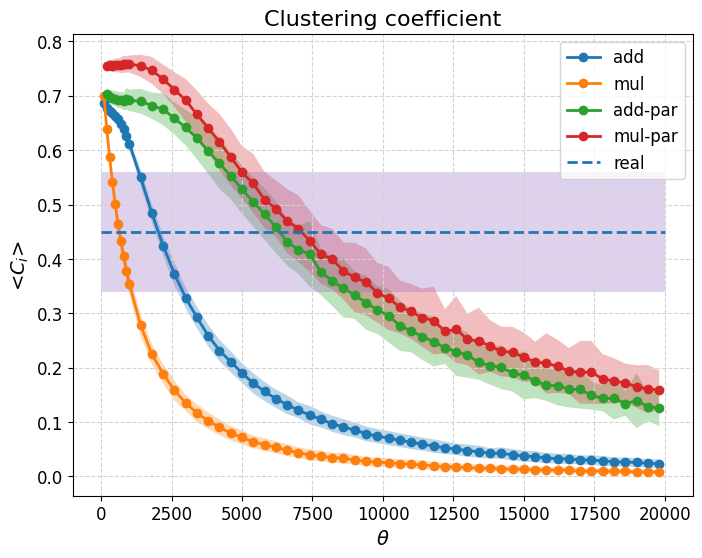

In [21]:
# Plot average clustering as a function of theta with fills
clust_add_mean = np.array(clust_add).mean(axis=0)
clust_mul_mean = np.array(clust_mul).mean(axis=0)
clust_add_par_mean = np.array(clust_add_par).mean(axis=0)
clust_mul_par_mean = np.array(clust_mul_par).mean(axis=0)

clust_add_std = np.array(clust_add).std(axis=0)
clust_mul_std = np.array(clust_mul).std(axis=0)
clust_add_par_std = np.array(clust_add_par).std(axis=0)
clust_mul_par_std = np.array(clust_mul_par).std(axis=0)

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.title(r'Clustering coefficient', fontsize=16)

# Plot with shaded regions
plt.plot(thetas, clust_add_mean, label='add', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, clust_add_mean - clust_add_std, clust_add_mean + clust_add_std, alpha=0.3)

plt.plot(thetas, clust_mul_mean, label='mul', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, clust_mul_mean - clust_mul_std, clust_mul_mean + clust_mul_std, alpha=0.3)

plt.plot(thetas_par, clust_add_par_mean, label='add-par', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas_par, clust_add_par_mean - clust_add_par_std, clust_add_par_mean + clust_add_par_std, alpha=0.3)

plt.plot(thetas_par, clust_mul_par_mean, label='mul-par', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas_par, clust_mul_par_mean - clust_mul_par_std, clust_mul_par_mean + clust_mul_par_std, alpha=0.3)


avg_clustering_real = 0.45
clustering_std = 0.11
clustering_soja = 0.47
plt.hlines(avg_clustering_real, 0, 20000, label='real', linestyle='--', linewidth=2)
plt.fill_between([0, 20000], avg_clustering_real - clustering_std, avg_clustering_real + clustering_std, alpha=0.3)
# plt.hlines(clustering_soja, 0, 20000, label='soja', linestyle='--', colors='green', linewidth=2)

# Add legend with a larger font size
plt.legend(fontsize=12)

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'<$C_i$>', fontsize=14)

# Add grid with a lighter color
plt.grid(color='lightgray', linestyle='--')

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

# plt.savefig(os.path.join(figpath, 'avg_clust(theta)_true.svg'))

### Centrality

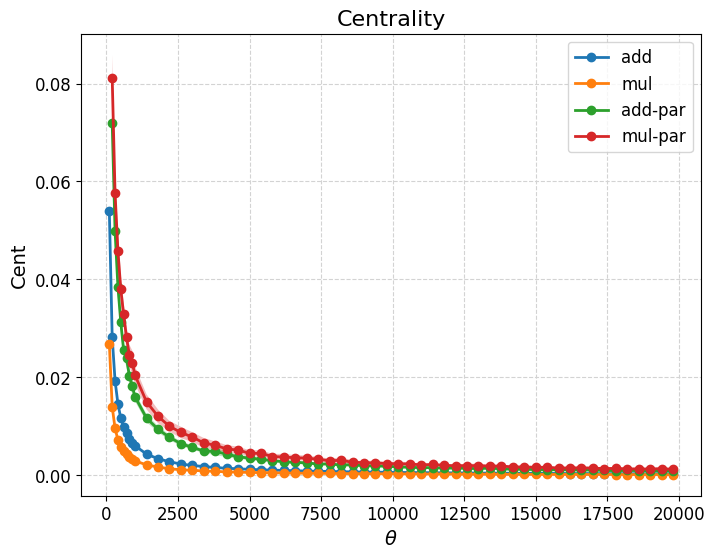

In [22]:
## Este es lo mismo que 

# Same plots for centrality
cent_add_mean = np.array(cent_add).mean(axis=0)
cent_mul_mean = np.array(cent_mul).mean(axis=0)
cent_add_par_mean = np.array(cent_add_par).mean(axis=0)
cent_mul_par_mean = np.array(cent_mul_par).mean(axis=0)

cent_add_std = np.array(cent_add).std(axis=0)
cent_mul_std = np.array(cent_mul).std(axis=0)
cent_add_par_std = np.array(cent_add_par).std(axis=0)
cent_mul_par_std = np.array(cent_mul_par).std(axis=0)

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.title(r'Centrality', fontsize=16)

# Plot with shaded regions
plt.plot(thetas, cent_add_mean, label='add', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, cent_add_mean - cent_add_std, cent_add_mean + cent_add_std, alpha=0.3)

plt.plot(thetas, cent_mul_mean, label='mul', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, cent_mul_mean - cent_mul_std, cent_mul_mean + cent_mul_std, alpha=0.3)

plt.plot(thetas_par, cent_add_par_mean, label='add-par', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas_par, cent_add_par_mean - cent_add_par_std, cent_add_par_mean + cent_add_par_std, alpha=0.3)

plt.plot(thetas_par, cent_mul_par_mean, label='mul-par', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas_par, cent_mul_par_mean - cent_mul_par_std, cent_mul_par_mean + cent_mul_par_std, alpha=0.3)


# Add legend with a larger font size
plt.legend(fontsize=12)

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'Cent', fontsize=14)

# Add grid with a lighter color
plt.grid(color='lightgray', linestyle='--')

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

plt.savefig(os.path.join(figpath, 'avg_centrality(theta).svg'))

### Assortativity

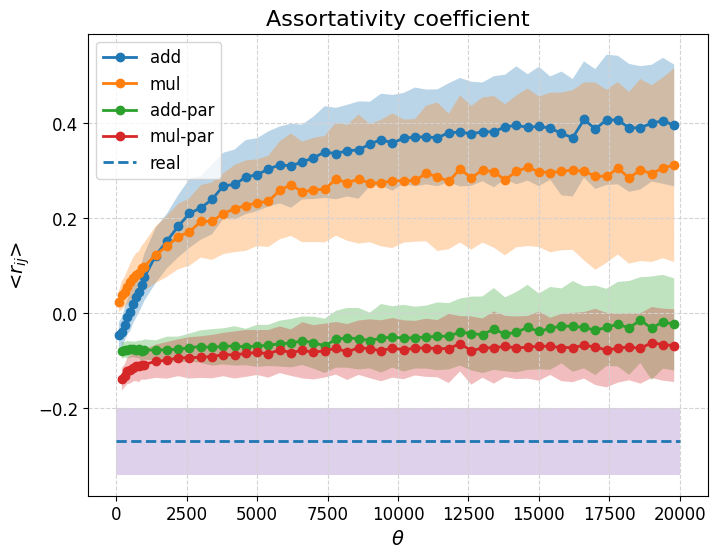

In [29]:
# Same plots for assortativity
asor_add_mean = np.nanmean(np.array(asor_add), axis=0)
asor_mul_mean = np.nanmean(np.array(asor_mul), axis=0)
asor_add_par_mean = np.nanmean(np.array(asor_add_par), axis=0)
asor_mul_par_mean = np.nanmean(np.array(asor_mul_par), axis=0)

asor_add_std = np.nanstd(np.array(asor_add), axis=0)
asor_mul_std = np.nanstd(np.array(asor_mul), axis=0)
asor_add_par_std = np.nanstd(np.array(asor_add_par), axis=0)
asor_mul_par_std = np.nanstd(np.array(asor_mul_par), axis=0)


plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.title(r'Assortativity coefficient', fontsize=16)

# Plot with shaded regions
plt.plot(thetas, asor_add_mean, label='add', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, asor_add_mean - asor_add_std, asor_add_mean + asor_add_std, alpha=0.3)

plt.plot(thetas, asor_mul_mean, label='mul', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, asor_mul_mean - asor_mul_std, asor_mul_mean + asor_mul_std, alpha=0.3)

plt.plot(thetas_par, asor_add_par_mean, label='add-par', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas_par, asor_add_par_mean - asor_add_par_std, asor_add_par_mean + asor_add_par_std, alpha=0.3)

plt.plot(thetas_par, asor_mul_par_mean, label='mul-par', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas_par, asor_mul_par_mean - asor_mul_par_std, asor_mul_par_mean + asor_mul_par_std, alpha=0.3)

avg_asor_real = -0.27
std_asor = 0.07
asor_soja = -0.25
plt.hlines(avg_asor_real, 0, 20000, label='real', linestyle='--', linewidth=2)
plt.fill_between([0, 20000], avg_asor_real - std_asor, avg_asor_real + std_asor, alpha=0.3)
# plt.hlines(asor_soja, 0, 20000, label='soja', linestyle='--', colors='green', linewidth=2)

# Add legend with a larger font size
plt.legend(fontsize=12)

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'<$r_{ij}$>', fontsize=14)

# Add grid with a lighter color
plt.grid(color='lightgray', linestyle='--')

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

# plt.savefig(os.path.join(figpath, 'avg_assortativity(theta).svg'))